# Lotto Number Predictions

This notebook performs a download of the most recent winning numbers from the Lotto649 (a lottery managed by the **British Columbia Lotto Corporation** in BC, Canada), and performs basic number analysis on them in order to describe the most winningest numbers in history.



## Resources

In [6]:
# Main Getter Function

import sys
import pandas as pd
import urllib.request
import zipfile

# Download 
def dl_file(url, data_path, file_name):
    print("### Downloading " + url + " and saving as " + data_path + file_name)
    urllib.request.urlretrieve(url, data_path + file_name)
    
    
# Unzip
def unzip(data_path, file_name):
  print("### Unzipping " + file_name + " at " + data_path)
  #extension = ".zip"

  zip_ref = zipfile.ZipFile(data_path + file_name, 'r')
  zip_ref.extractall(data_path)
  zip_ref.close()

# Variables - TODO - make abstract to handle other sets
url = "http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip"
data_path = "data/"
file_name = "649"

# download zip file and save
dl_file(url, data_path, file_name)

# unzip to csv
unzip(data_path, file_name)


### Downloading http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip and saving as data/649
### Unzipping 649 at data/


## Conversion

In [5]:
import csv
import pandas as pd


def read_csv(data_path, file_name):
    extension = ".csv"
    path = data_path + file_name + extension
    print("### Reading " + path)
    index = 0

    with open(path, newline='') as f:
        #reader = csv.reader(f, delimiter=',')
        reader = pd.read_csv(path)
        reader.set_index("DRAW NUMBER", inplace=True)
        for row in reader:
            print(', '.join(row))
            index += 1

        row_count = sum(1 for row in reader)
        print("Read " + str(index) + " lines")
        return reader


In [6]:
base_reader = pd.read_csv(data_path + file_name + ".csv")
base_reader.set_index("DRAW NUMBER", inplace=True)
base_reader.tail()

,PRODUCT,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
DRAW NUMBER,,,,,,,,,,
3468,649,0,2017-04-15,11,19,22,23,41,46,5
3469,649,0,2017-04-19,4,11,21,24,44,49,41
3470,649,0,2017-04-22,4,7,15,16,43,48,26
3471,649,0,2017-04-26,9,10,11,13,45,49,24
3472,649,0,2017-04-29,10,23,26,40,45,46,12


In [33]:
draws = base_reader[["NUMBER DRAWN 1","NUMBER DRAWN 2","NUMBER DRAWN 3","NUMBER DRAWN 4","NUMBER DRAWN 5","NUMBER DRAWN 6"]]
draws.head()


,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
DRAW NUMBER,,,,,,
1,3,11,12,14,41,43
2,8,33,36,37,39,41
3,1,6,23,24,27,39
4,3,9,10,13,20,43
5,5,14,21,31,34,47


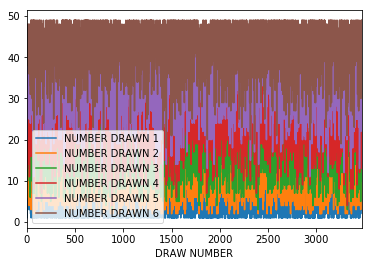

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

draws.plot()
plt.show()

## Analysis

In [10]:
draw_one = draws[["NUMBER DRAWN 1"]]
draw_one.head()

,NUMBER DRAWN 1
DRAW NUMBER,
1,3
2,8
3,1
4,3
5,5


In [11]:
# one way
(draw_one == 16).sum()

NUMBER DRAWN 1    64
dtype: int64

In [12]:
# another way
draw_one[draw_one == 16].count()

NUMBER DRAWN 1    64
dtype: int64

In [13]:
# store min
min = draw_one.min()
min

NUMBER DRAWN 1    1
dtype: int64

In [14]:
# store max
max = draw_one.max()
max

NUMBER DRAWN 1    38
dtype: int64

In [30]:
dovc = draw_one['NUMBER DRAWN 1'].value_counts()
dovc.columns = ["value"]
dovc.head(10)

1     414
2     382
4     340
3     337
5     255
6     226
7     224
9     184
8     182
10    146
Name: NUMBER DRAWN 1, dtype: int64

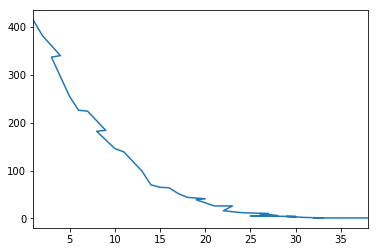

In [17]:
dovc.plot()

In [18]:
dom = dovc.to_frame()
dom.columns = ["value"]

max_one = dom.iloc[0]
max_one


value    414
Name: 1, dtype: int64

## Max Numbers

In [34]:

total_counts = []
total_values = []
for index, column in enumerate(draws.columns):
    df = draws[column].value_counts().to_frame()
    df.columns = ["value"]
    val = df.iloc[0]
    total_counts.append(val.name)
    total_values.append(val.value)
    print("Most drawn number for " + str(val) + " is the number " + str(val.name) + " at " + str(val.value) + " times.")

Most drawn number for value    414
Name: 1, dtype: int64 is the number 1 at 414 times.
Most drawn number for value    188
Name: 12, dtype: int64 is the number 12 at 188 times.
Most drawn number for value    173
Name: 22, dtype: int64 is the number 22 at 173 times.
Most drawn number for value    192
Name: 31, dtype: int64 is the number 31 at 192 times.
Most drawn number for value    205
Name: 38, dtype: int64 is the number 38 at 205 times.
Most drawn number for value    430
Name: 49, dtype: int64 is the number 49 at 430 times.


In [35]:
total_counts

[1, 12, 22, 31, 38, 49]

In [36]:
total_values

[414, 188, 173, 192, 205, 430]

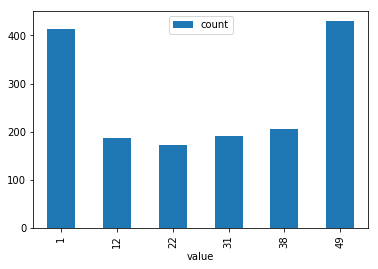

In [42]:
df = pd.DataFrame({'value':total_counts, 'count':total_values})
df.plot('value', 'count', kind='bar')

In [43]:
df

,count,value
0,414,1
1,188,12
2,173,22
3,192,31
4,205,38
5,430,49
